# Example1 - Getting started

This example is intended to show the basic usage of the package, and how to run a simple analysis with it, the example is taken from **[C81](#ref-1)** and represents a 5 story shear-type building.

To access the data and the exact results of the system we can call the ```example_data()``` function under the submodule ```functions.gen```, which will return a tuple where the first output is an array representing the acceleration time histories of the system, the second is an array representing the input excitation provided to the DOFs of the system (white noise), and the third output is a tuple containing the exact result in terms of modal parameters (natural frequencies, mode shapes and damping ratios) obtained from the modal analysis of the system.

In [1]:
import os
import sys
import numpy as np
# Add the directory we execute the script from to path:
sys.path.insert(0, os.path.realpath('__file__'))

# import the function to generate the example dataset
from pyoma2.functions.gen import example_data

# generate example data and results
data, U, ground_truth = example_data()

# Print the exact results
np.set_printoptions(precision=3)
print(f"the natural frequencies are: {ground_truth[0]} \n")
print(f"the damping is: {ground_truth[1]} \n")
print("the (column-wise) mode shape matrix: \n"
f"{ground_truth[2]} \n")

the natural frequencies are: [0.89  2.598 4.095 5.261 6.   ] 

the damping is: 0.02 

the (column-wise) mode shape matrix: 
[[-0.117  0.108  0.09   0.064  0.033]
 [-0.108  0.033 -0.064 -0.117 -0.09 ]
 [-0.09  -0.064 -0.108  0.033  0.117]
 [-0.064 -0.117  0.033  0.09  -0.108]
 [-0.033 -0.09   0.117 -0.108  0.064]] 



Now we can instantiate the ```SingleSetup``` class, passing the dataset and the sampling frequency as arguments

In [2]:
from pyoma2.setup.single import SingleSetup

simp_5dof = SingleSetup(data, fs=100)

To analise the data we need to instantiate the desired algorithm to use with a name and the required arguments.

In [3]:
from pyoma2.algorithms.fdd import FDD
from pyoma2.algorithms.ssi import SSI

# Initialise the algorithms
fdd = FDD(name="FDD", nxseg=2**11, method_SD="per")
ssidat = SSI(name="SSIdat", method="dat", br=30, ordmax=50, step=2)

# Add algorithms to the class
simp_5dof.add_algorithms(fdd, ssidat)

# run
simp_5dof.run_all()

2025-06-09 17:09:26,650 - pyoma2.setup.base - INFO - Running FDD... (base:123)
2025-06-09 17:09:26,686 - pyoma2.setup.base - INFO - Running SSIdat... (base:123)
2025-06-09 17:09:26,703 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: dat... (ssi:89)
2025-06-09 17:09:27,002 - pyoma2.functions.ssi - INFO - SSI for increasing model order... (ssi:462)
100%|██████████| 26/26 [00:00<00:00, 15160.84it/s]
2025-06-09 17:09:27,020 - pyoma2.functions.ssi - INFO - Calculating modal parameters for increasing model order... (ssi:628)
100%|██████████| 26/26 [00:00<00:00, 2573.80it/s]
2025-06-09 17:09:27,075 - pyoma2.setup.base - INFO - all done (base:102)


We can now check the results

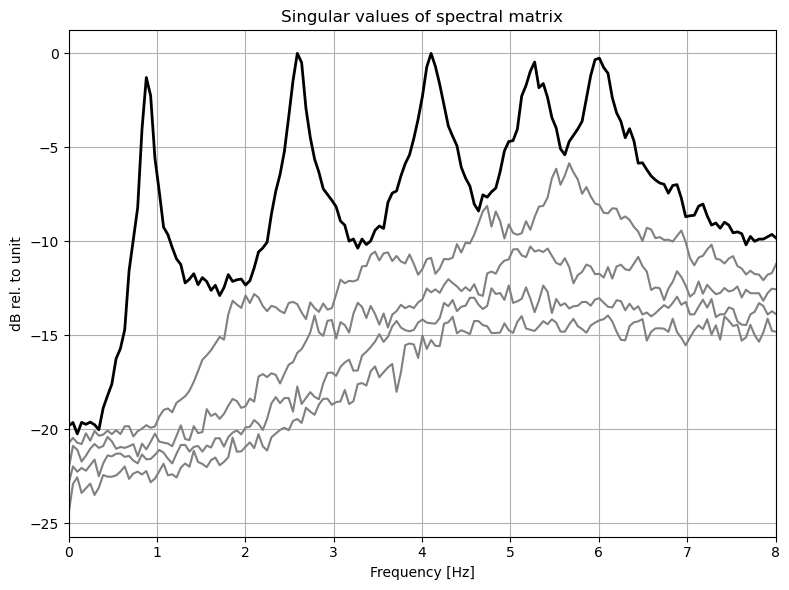

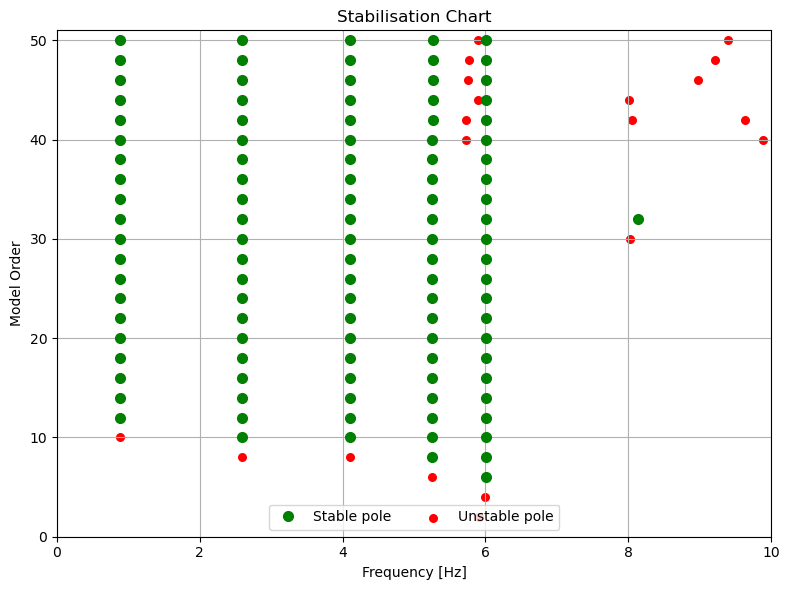

In [4]:
# plot singular values of the spectral density matrix
_, _ = fdd.plot_CMIF(freqlim=(0,8))

# plot the stabilisation diagram
_, _ = ssidat.plot_stab(freqlim=(0,10),hide_poles=False)

We can get the modal parameters with the help of an interactive plot calling the ```mpe_from_plot()``` method, or we can get the results "manually" with the ```mpe()``` method.

In [5]:
# get the modal parameters with the interactive plot
# simp_ex.mpe_from_plot("SSIdat", freqlim=(0,10))

# or manually
simp_5dof.mpe("SSIdat", sel_freq=[0.89, 2.598, 4.095, 5.261, 6.], order_in=30)

2025-06-09 17:09:27,319 - pyoma2.setup.base - INFO - Getting mpe modal parameters from SSIdat (base:149)
2025-06-09 17:09:27,320 - pyoma2.functions.ssi - INFO - Extracting SSI modal parameters (ssi:1036)
100%|██████████| 5/5 [00:00<00:00, 7259.09it/s]


Now we can access all the results and compare them to the exact values.

In [6]:
# dict of results
ssidat_res = dict(ssidat.result)

# print the results
print(f"order out: {ssidat_res['order_out']} \n")
print(f"the natural frequencies are: {ssidat_res['Fn']} \n")
print(f"the dampings are: {ssidat_res['Xi']} \n")
print("the (column-wise) mode shape matrix:")
print(f"{ssidat_res['Phi'].real} \n")

order out: 30 

the natural frequencies are: [0.886 2.593 4.099 5.253 6.008] 

the dampings are: [0.02  0.018 0.019 0.021 0.021] 

the (column-wise) mode shape matrix:
[[ 1.    -0.909  0.781 -0.538  0.278]
 [ 0.914 -0.279 -0.545  1.    -0.763]
 [ 0.759  0.549 -0.917 -0.291  1.   ]
 [ 0.539  1.     0.296 -0.758 -0.915]
 [ 0.291  0.761  1.     0.922  0.55 ]] 



## References
<a id="ref-1"></a>[C81] Chopra, Anil K. (1981). Dynamics of structures. Pearson Prentice Hall.
